In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
from louvain import detect_communities, modularity

In [3]:
def draw_communities(G, node_size=30, alpha=1, k=None, randomized=False):
    partition = detect_communities(G, randomized=randomized)
    print("Modularity for best partition:", modularity(G, partition))
    community_map = {}
    for community, nodes in enumerate(partition):
        for node in nodes:
            community_map[node] = community
    
    cmap = plt.get_cmap("jet")
    pos = nx.spring_layout(G, k=k)
    indexed = [community_map.get(node) for node in G]
    plt.axis("off")
    
    nx.draw_networkx_nodes(G, pos=pos, cmap=cmap, node_color=indexed, node_size=node_size, alpha=alpha)
    nx.draw_networkx_edges(G, pos=pos, alpha=0.2)

Modularity for best partition: 0.44490358126721774


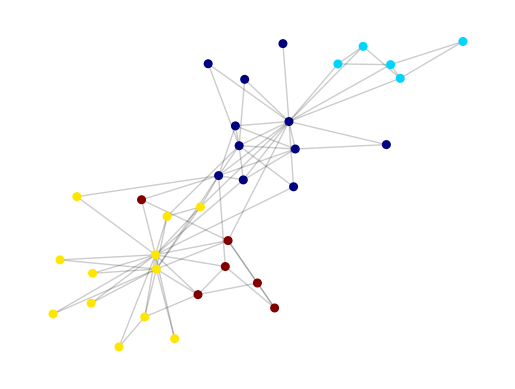

In [4]:
G = nx.karate_club_graph()
draw_communities(G)

In [39]:
import random

number_of_test_nodes = 1000
# Specify the input and output file paths
input_file_path = 'data/com-amazon.ungraph.txt'
output_file_path = 'data/com-amazon.ungraph.sample.{}.txt'.format(number_of_test_nodes)

# Function to get number_of_test_nodes random lines from a file
def get_random_lines(file_path, num_lines=number_of_test_nodes):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        random_lines = random.sample(lines, min(num_lines, len(lines)))
    return random_lines

# Function to write lines to a file
def write_lines_to_file(lines, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.writelines(lines)

# Get 100 random lines from the input file
random_lines = get_random_lines(input_file_path)

# Write the random lines to the output file
write_lines_to_file(random_lines, output_file_path)

In [40]:
def read_amazone_data(file_name):
    G = nx.Graph()
    with open(file_name, "r") as f:
        for line in f:
            if line[0] == "#":
                continue
            N1, N2 = map(int, line.split())
            G.add_edge(N1, N2)
    return G

In [41]:
caltech_graph = read_amazone_data("data/com-amazon.ungraph.sample.{}.txt".format(number_of_test_nodes))

Modularity for best partition: 0.998983999999912


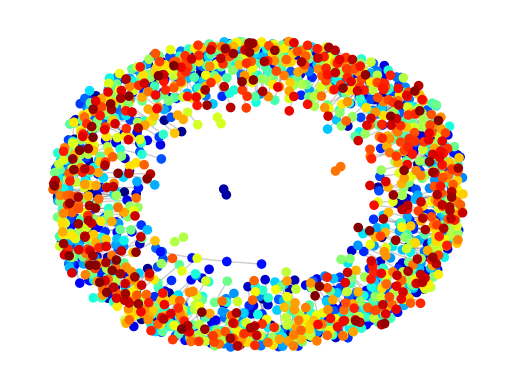

In [42]:
draw_communities(caltech_graph, node_size=35, k=0.12)